# ECDF plots

In [1]:
# uncomment the following:

 library('tidyverse')
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



This cell provides the data 👇.

In [30]:
 otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
     gather(characteristic, value, -species, -museum, -accession) %>%
     drop_na()

 otter.data %>% head

#shortcut for %>% is command + shift+ m 

,species,museum,accession,characteristic,value
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,A. cinerea,AMNH,101458,m1,15.100
2,A. cinerea,AMNH,101461,m1,12.740
3,A. cinerea,AMNH,101466,m1,12.425
4,A. cinerea,AMNH,101635,m1,13.400
5,A. cinerea,AMNH,101459,m1,14.400
6,A. cinerea,AMNH,101462,m1,14.525


Make an ECDF plot of `value` and:
- facet by characteristic
- allow the x-axis of each facetted plot to be independent (for the value of the the `scales` argument in `facet_wrap` use `"free_x"`)
- color/group by species  

Species names are typically italicized. Use `theme` and `element_text` to adjust the legend text so that it is italic.

Which otter species has the smallest skull?

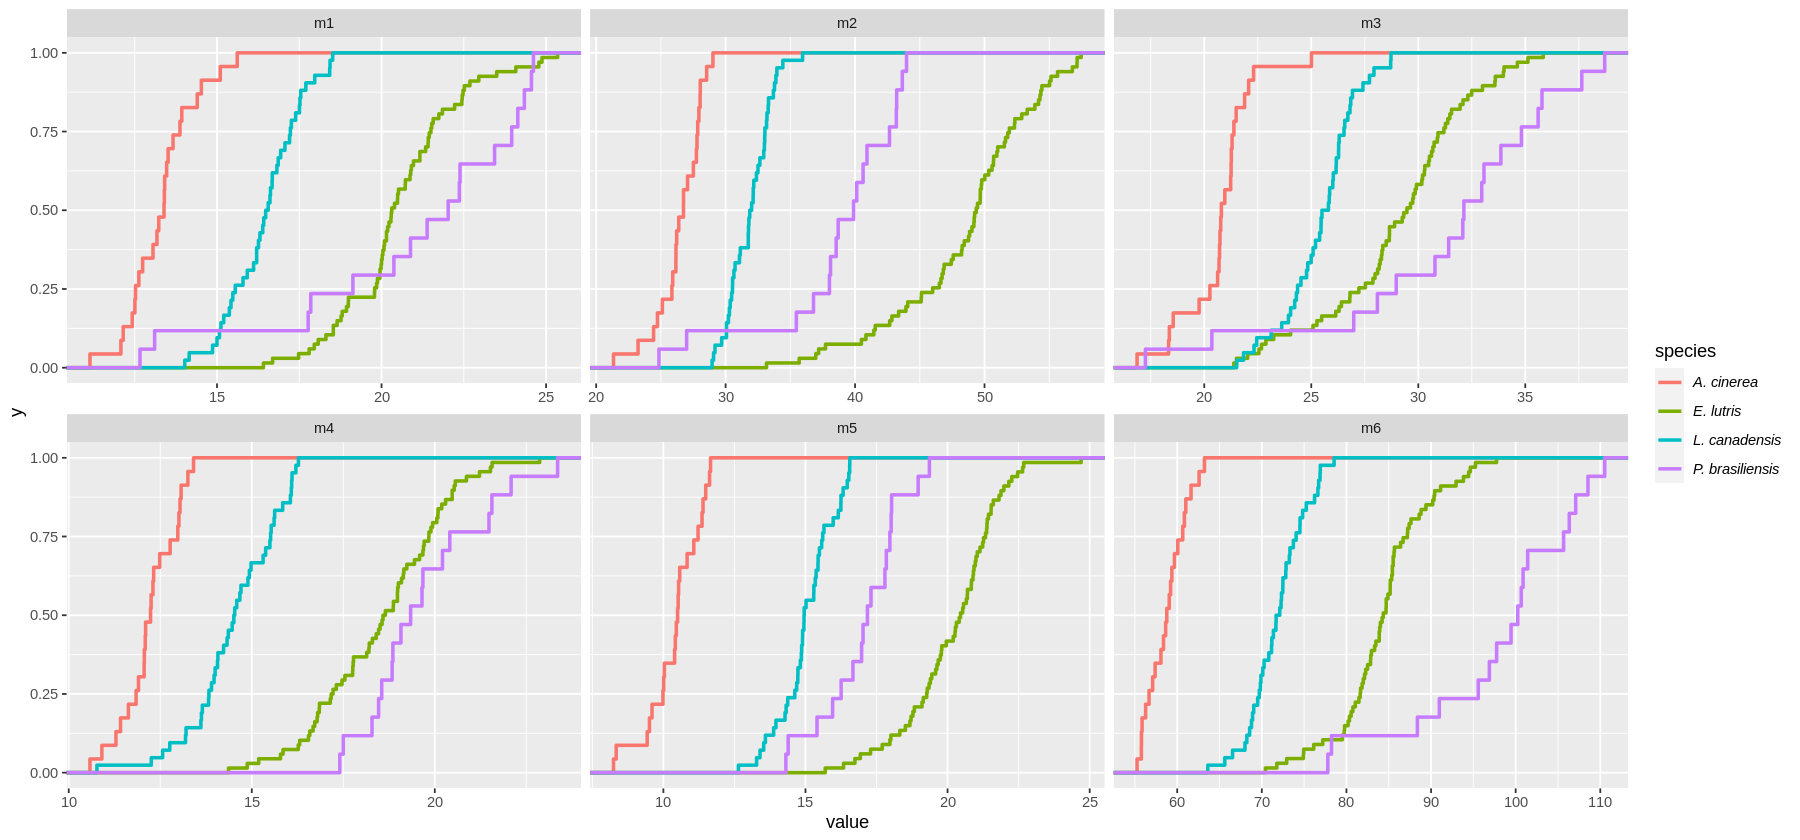

In [42]:
options(repr.plot.res = 120, repr.plot.height = 7, repr.plot.width = 15)

p = ggplot(otter.data, aes(x = value, color = species, group = species) )

p = p + facet_wrap(~characteristic, scales = "free_x")

p = p + theme(legend.text = element_text(face = "italic"))
#this italicizes the labels of the species in the legend

p = p + stat_ecdf(geom = "step", size =1, alpha = 1)

#p = p + geom_hline(aes(yintercept = 0.50), color = 'orange')
#p = p + geom_hline(aes(yintercept = 0.25), color = 'blue')
#p = p + geom_hline(aes(yintercept = 0.75), color = 'red')

p

You can uncomment the following line and change the cell type to `markdown` to see what the solution should look like 👇. 

 <img src="ecdf_otter_skull.png" />